In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
youtube_data = pd.read_csv("youtube_dataset.csv", index_col="video_id")

In [8]:
youtube_data.head()

,published_at,title,channel_id,channel_title,view_count,like_count,dislike_count,favorite_count,comment_count,duration,...,channel_description,channel_published_at,videoCount,tags,category_id,default_language,default_audio_language,license,content_rating,share_count
video_id,,,,,,,,,,,,,,,,,,,,,
LyZbFPQLJSI,2024-03-10T15:55:30Z,Cooking with Mommy ! BillionSurpriseToys Nurse...,UCRx3mKNUdl8QE06nEug7p6Q,BillionSurpriseToys - Nursery Rhymes & Cartoons,443,NaN,NaN,0,NaN,00:00:00,...,Welcome to the world of Billion Surprise Toys!...,2013-10-25T23:18:43Z,982,"['BillionSurpriseToys', 'english', 'kids carto...",24,en,en,youtube,{},NaN
UpdkbTaDEtI,2024-03-10T14:00:16Z,"This Is How Fish Was Fried 3,000 Years Ago! De...",UCj4KP216972cPp2w_BAHy8g,WILDERNESS COOKING,36659,3259.0,NaN,0,242.0,02:31:47,...,"I am Tawakkul, a 50-year-old Gamarvan resident...",2020-01-15T12:04:14.378435Z,367,"['wilderness', 'wilderness cooking', 'recipe',...",26,en,en,youtube,{},NaN
Io1l_CEqPKA,2024-03-10T13:00:15Z,Crayfish Straight from the River! Cooking In T...,UCjAKzWYZLayOQfSud0lU1vQ,Royal Cooking,12421,634.0,NaN,0,63.0,01:30:38,...,Hello everyone This is our second channel for ...,2022-07-11T08:30:44.046857Z,197,"['cooking show', 'cooking', 'cooking outdoor',...",22,NaN,en,youtube,{},NaN
RRr3MtjUTDI,2024-03-10T12:40:35Z,""" Chicken Vegetable Fried Rice "" Bajias Cooking",UCtJFmSBTZHLBgRDwW9H2qHQ,Bajiascooking,679,49.0,NaN,0,0.0,00:04:34,...,For everyone who loves to cook!\n\nContact/Par...,2009-05-13T23:07:59Z,1958,"['Bajias Cooking Recipe', 'Traditional', 'Food...",27,NaN,NaN,youtube,{},NaN
oKEuCmzU6pA,2024-03-10T12:00:13Z,3 Days: Livestock Farm Cleaning Process - Cook...,UCzOzzXXz5R3aytqUR5LkNZg,Lý Thị Ca,39289,2237.0,NaN,0,211.0,00:30:58,...,I am a girl from a small village in the countr...,2019-03-27T02:29:49Z,397,"['Cooking', 'Lý Thị Ca', 'Livestock', 'Farm', ...",22,en,en,youtube,{},NaN


### Step 1:
## Preprocessing

In [4]:
from datetime import timedelta

# Remove duplicates
youtube_data.drop_duplicates(inplace=True)

# Convert 'published_at' to datetime
youtube_data['video_published_at'] = pd.to_datetime(youtube_data['published_at'])
youtube_data['channel_published_at'] = pd.to_datetime(youtube_data['channel_published_at'])
youtube_data['number_of_words_in_title'] = youtube_data['title'].apply(lambda x: len(x.split()))
youtube_data['number_of_words_in_channel_description'] = youtube_data['channel_description'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
youtube_data['number_of_tags'] = youtube_data['tags'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Convert 'duration' to seconds
def duration_to_seconds(duration):
    try:
        time_parts = duration.split(':')
        return int(time_parts[0]) * 3600 + int(time_parts[1]) * 60 + int(time_parts[2])
    except:
        return None

youtube_data['duration_seconds'] = youtube_data['duration'].apply(duration_to_seconds)

# Remove unnecessary columns
columns_to_drop = ['duration', 'favorite_count', 'dislike_count', 'definition', 'channel_title',
                   'default_language', 'default_audio_language', 'license', 'content_rating', 'share_count']
youtube_data.drop(columns_to_drop, axis=1, inplace=True)

# Check for missing values
youtube_data.isnull().sum()

ValueError: time data "2020-01-15T12:04:14.378435Z" doesn't match format "%Y-%m-%dT%H:%M:%S%z", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [5]:
# Fill in missing values with 0 - videos without likes/comments have no relevant key
youtube_data['like_count'] = youtube_data['like_count'].fillna(0)
youtube_data['comment_count'] = youtube_data['comment_count'].fillna(0)

In [6]:
# Calculate the ratio of likes per view and comments per view
youtube_data['likes_per_view'] = youtube_data['like_count'] / youtube_data['view_count']
youtube_data['comments_per_view'] = youtube_data['comment_count'] / youtube_data['view_count']

youtube_data.head()

,published_at,view_count,like_count,comment_count,duration_seconds,likes_per_view,comments_per_view
video_id,,,,,,,
uexN9gs5gvM,2023-05-04 19:01:39+00:00,14735004,117530.0,1076.0,273,0.007976,0.000073
WXPfcRnz9Z8,2023-01-19 20:02:53+00:00,6228419,62711.0,911.0,159,0.010069,0.000146
K-mV_8aeQsk,2023-06-23 14:00:15+00:00,7501791,38685.0,1138.0,664,0.005157,0.000152
hplD4QyV4Q8,2019-02-24 03:00:05+00:00,15445316,100024.0,2370.0,186,0.006476,0.000153
XqHLbmM6Iew,2023-11-23 12:35:32+00:00,1049158,14913.0,136.0,332,0.014214,0.000130


### Step 2:
## Clustering

First we'll want to visualize the data.

Since our data have more then 3 dimetions, We'll use t-SNE algorithm for 2D visualization

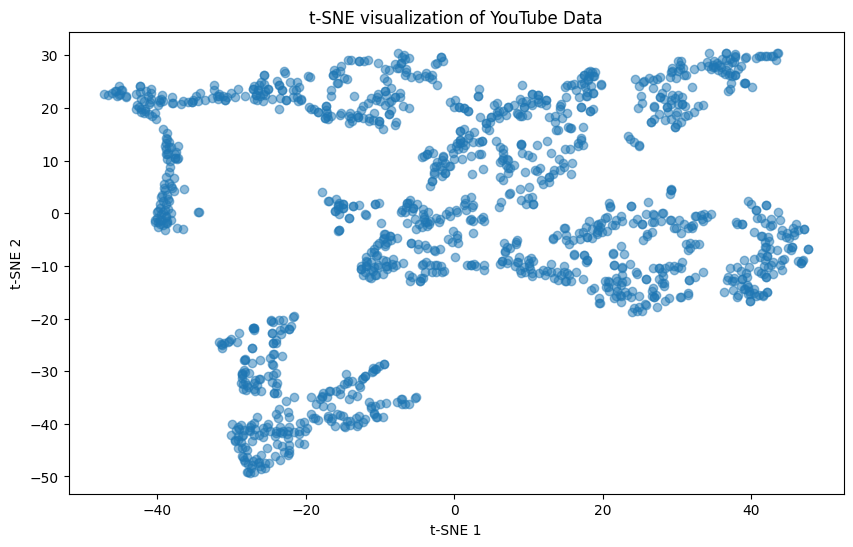

In [7]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Calculate the number of days since the first video in the dataset was published
youtube_data['days_since_published'] = (youtube_data['published_at'] - youtube_data['published_at'].min()).dt.days

# Selecting a subset of relevant numerical features for t-SNE
features = ['view_count', 'like_count', 'comment_count', 'duration_seconds', 'days_since_published']
data_subset = youtube_data[features]

# Standardizing the data (necessary for t-SNE)
scalar = StandardScaler()
data_subset_scaled = scalar.fit_transform(data_subset)

# Applying t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(data_subset_scaled)

# Plotting the results of t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.title('t-SNE visualization of YouTube Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

We can visualy detect 3 clusters from the t-SNE plot, which is quiet different from the other samples

For better understanding we'll also try PCA 

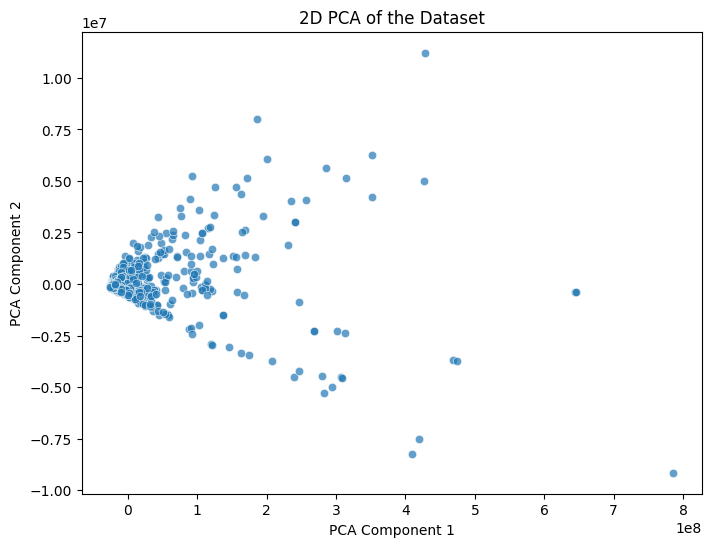

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Standardizing the data (necessary for t-SNE)
mm = MinMaxScaler()
data_subset_scaled = mm.fit_transform(data_subset)

# Assuming data_subset_scaled is your preprocessed dataset ready for PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_subset)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of the Dataset')
plt.show()

In [9]:
print(pca.explained_variance_ratio_)
print(f'Total Variance captured from the data: {np.sum(pca.explained_variance_ratio_):.3f}')

[9.99768518e-01 2.31468151e-04]
Total Variance captured from the data: 1.000


In [10]:
print(pca.components_)

[[ 9.99818307e-01  1.90616523e-02  7.78719960e-05 -1.52937872e-06
  -1.66896299e-06]
 [-1.90617480e-02  9.99817151e-01  1.51214693e-03 -1.21605630e-04
   1.15266672e-04]]


The first principal component overwhelmingly dominates, capturing almost all the variance in the dataset. This suggests that a significant amount of information about the dataset can be represented along this single dimension.

Additionally, if the PCA is capable of capturing 100% of the variance in our data, there isn't clusters. But, we can see a bunch of outliers

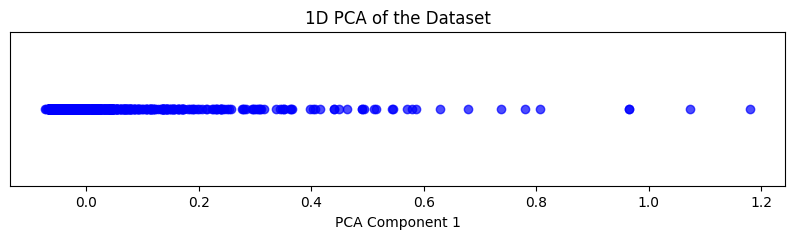

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data_subset' is your original dataset
mm = MinMaxScaler()
data_subset_scaled = mm.fit_transform(data_subset)

# Applying PCA to the scaled data for 1 component
pca = PCA(n_components=1)
data_pca_1d = pca.fit_transform(data_subset_scaled)

# 1D visualization
plt.figure(figsize=(10, 2))  # Adjust the figure size as needed
plt.scatter(data_pca_1d[:, 0], np.zeros(len(data_pca_1d)), alpha=0.7, c='blue')
plt.xlabel('PCA Component 1')
plt.title('1D PCA of the Dataset')
plt.yticks([])  # Hide the y-axis as it's not meaningful in this 1D context
plt.show()
